In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def noise(data):
    noise = np.random.normal(0, np.abs(0.01 * data), size=data.shape)#noise=0; 0.01; 0.005; 0.0025
    noisy_data = data + noise
    return noisy_data

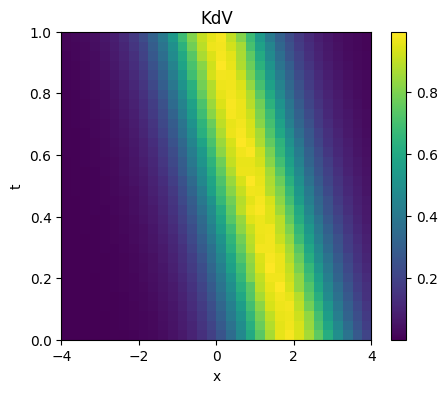

In [10]:
k = 0.7
A = 1
c = 1
ksi0 = 0
alf = 0.5
x = np.linspace(-4, 4, 32)#границы
t = np.linspace(0, 1, 32)#время
T, X = np.meshgrid(t, x, indexing = 'ij')

dx = (4 - (-4)) / 32
dt = (1 - 0) / 32

u = noise((2 * (k ** 2)) / ((np.cosh(- k * (X - 4* (k**2) * T))) ** 2))#уравнение u_t + u_xxx + 6uu_x = 0
#u = noise((-2 * (k ** 2)) / ((np.cosh(- k * (X - 4* (k**2) * T))) ** 2))#уравнение u_t + u_xxx - 6uu_x = 0
#u = noise(3 * (alf**2) / (np.cosh(- (alf/2) * (X - (alf**2) * T))) ** 2))#уравнение u + u_xxx + uu_x = 0
u_t = noise((- 16 * (k ** 5) *np.sinh(- k * (X - 4* (k**2) * T)))/ (np.cosh(- k * (X - 4* (k**2) * T)) ** 3))
u_x = noise((4 * (k ** 3) *np.sinh(- k * (X - 4* (k**2) * T)))/ (np.cosh(- k * (X - 4* (k**2) * T)) ** 3))

u_xxx = noise(((16 * (k ** 5) *(((3  * ((np.sinh(- k * (X - 4* (k**2) * T))) ** 2)) / ((np.cosh(- k * (X - 4* (k**2) * T))) ** 2)) - 2)) * np.sinh(- k * (X - 4* (k**2) * T)))/ (np.cosh(- k * (X - 4* (k**2) * T)) ** 3))
uu_x6 = noise((48 * (k ** 5) *np.sinh(- k * (X - 4* (k**2) * T))) / (np.cosh(- k * (X - 4* (k**2) * T)) ) ** 5)
#u = noise(-((18*np.exp((1/125)*(T + 25*X))*(16*np.exp(2*T) + 
#       1000*np.exp((126*T)/125 + (4*X)/5) + 9*np.exp(2*X) + 576*np.exp(T + X) + #двусолитонные решения
#       90*np.exp((124*T)/125 + (6*X)/5)))/(5*(40*np.exp((126*T)/125) + 
#        18*np.exp(T + X/5) + 9*np.exp((6*X)/5) + 45*np.exp(T/125 + X))**2)))

#u = 160*np.exp(16*T + 4*X)*((9 + 28*np.exp(112*T + 4*X) + 630*np.exp(128*T + 8*X) + 6300*np.exp(144*T + 12*X) + 
#                             1225*np.exp(256*T + 16*X)) / (1 + 45*np.exp(16*T + 4*X) + 35*np.exp(128*T + 8*X) + 175*np.exp(144*T + 12*X)) ** 2)

#u = 24*((np.exp(2*X - 2*T) + 6*np.exp(6*X - 18*T) + 4*np.exp(4*X - 16*T) + 
#                             4*np.exp(8*X - 20*T) + np.exp(10*X - 34*T)) / (1 + 3*np.exp(2*X - 2*T) + np.exp(6*X - 18*T) + 3*np.exp(4*X - 16*T)) ** 2)

plt.figure(figsize=(5, 4))
plt.imshow(u, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('KdV')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

0.025979836968755284
1.7771159685873443
-1.5418163699778666


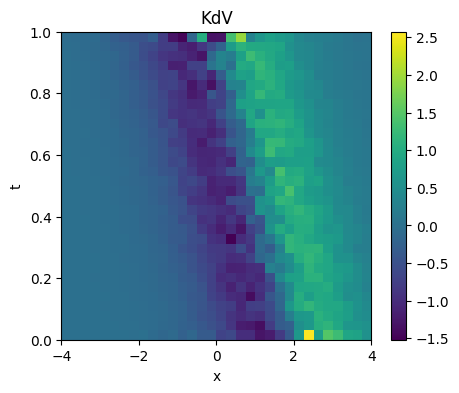

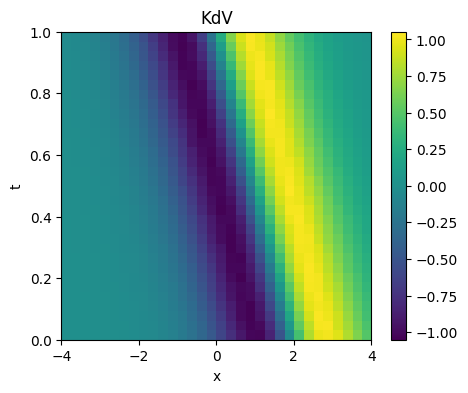

In [15]:
u1 = np.gradient(u, dt, axis=0, edge_order=2) # по t
u2 = u_t

print(np.square(u1 - u2).mean(axis=None))
print(np.max(u1 - u2))
print(np.min(u1 - u2))

plt.figure(figsize=(5, 4))
plt.imshow(u1, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('KdV')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(u2, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('KdV')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

0.0002592825536423285
0.06154161212294708
-0.08701285329169217


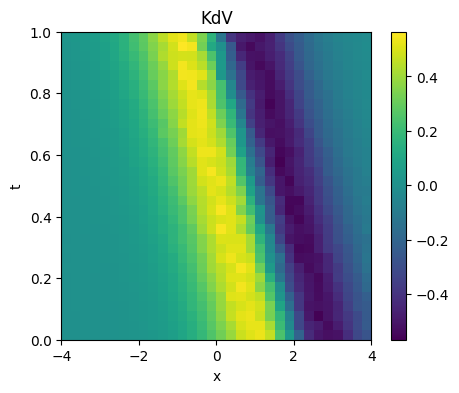

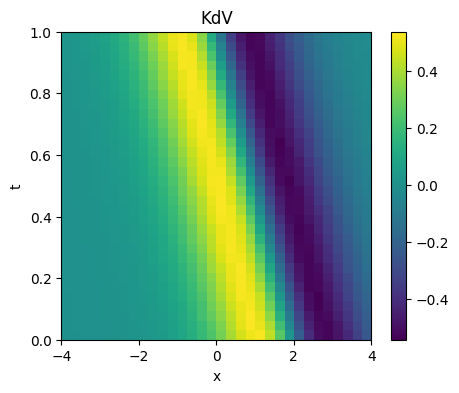

In [16]:
u1 = np.gradient(u, dx, axis=1, edge_order=2)# по x
u2 = u_x
print(np.square(u1 - u2).mean(axis=None))
print(np.max(u1 - u2))
print(np.min(u1 - u2))

plt.figure(figsize=(5, 4))
plt.imshow(u1, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('KdV')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(u2, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('KdV')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

0.005464336046871117
0.0003480665315595782
0.3636178545951258
-0.49694551944124854


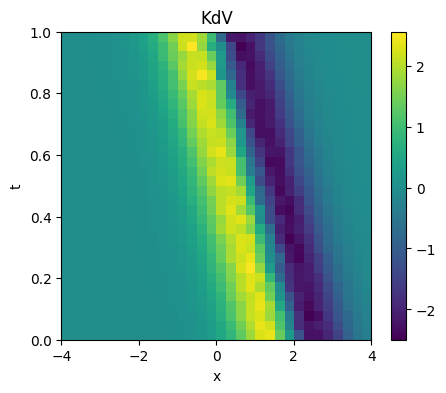

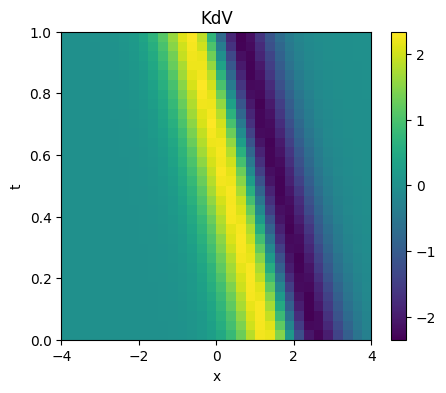

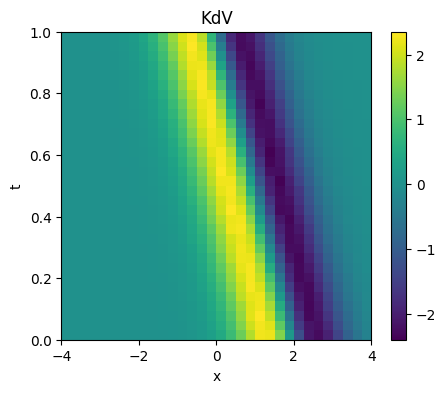

In [17]:
u1 = u * 6 * (np.gradient(u, dx, axis=1, edge_order=2))
u2 = uu_x6
u3 = u_x * u * 6
print(np.square(u1 - u2).mean(axis=None))
print(np.square(u2 - u3).mean(axis=None))
print(np.max(u1 - u2))
print(np.min(u1 - u2))
plt.figure(figsize=(5, 4))
plt.imshow(u1, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('KdV')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(u2, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('KdV')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(u3, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('KdV')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

0.04018617827020972
0.9679120125974994
-0.9285011254376819


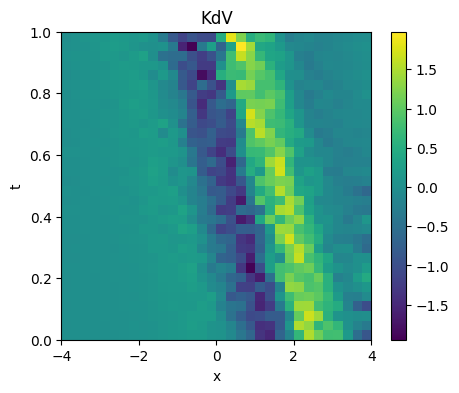

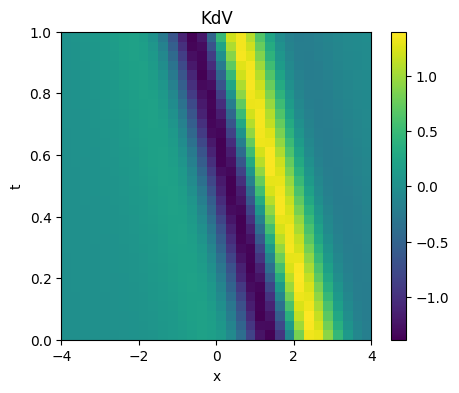

In [18]:
u1 = np.gradient(np.gradient(np.gradient(u, dx, axis=1, edge_order=2), dx, axis=1, edge_order=2), dx, axis=1, edge_order=2)
u2 = u_xxx

print(np.square(u1 - u2).mean(axis=None))
print(np.max(u1 - u2))
print(np.min(u1 - u2))

plt.figure(figsize=(5, 4))
plt.imshow(u1, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('KdV')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(u2, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('KdV')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

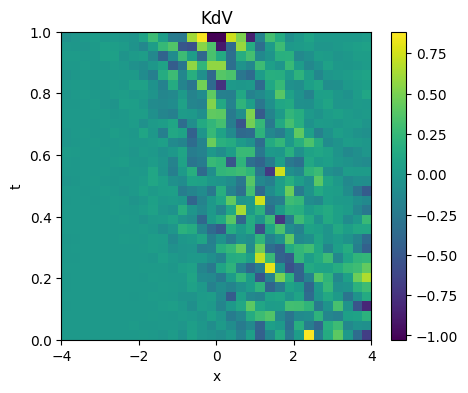

In [19]:
#u1 = np.load('kdv_Gradient_x_noise0.npy') * u 
u1 = (6 * u  * np.gradient(u, dx, axis=1, edge_order=2)) + (np.gradient(u, dt, axis=0)) + (np.gradient((np.gradient((np.gradient(u, dx, axis=1, edge_order=2)), dx, axis=1, edge_order=2)), dx, axis=1, edge_order=2))

plt.figure(figsize=(5, 4))
plt.imshow(u1, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('KdV')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

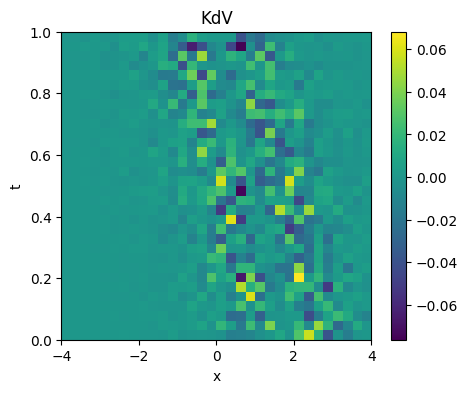

In [20]:
#u1 = np.load('kdv_Gradient_x_noise0.npy') * u 
u1 = u_t + u_xxx + uu_x6

plt.figure(figsize=(5, 4))
plt.imshow(u1, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('KdV')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

u = np.load('data_kdv_noise0.npy')
u_x = np.load('data_kdv_noise0_u_x.npy')
u_t = np.load('data_kdv_noise0_u_t.npy')
u_xxx = np.load('data_kdv_noise0_u_xxx.npy')

# Приведение данных к векторному виду
u = u.flatten()
u_x = u_x.flatten()
u_t = u_t.flatten()
u_xxx = u_xxx.flatten()

X = np.vstack((u_xxx, u * u_x)).T  #признаки
y = -u_t  #целевая переменная

model = LinearRegression()

model.fit(X, y)
coefficients = model.coef_

# Вывод коэффициентов
print(f"Коэффициенты перед членами уравнения:")
print(f"Коэффициент перед u_xxx: {coefficients[0]}")
print(f"Коэффициент перед uu_x: {coefficients[1]}")



FileNotFoundError: [Errno 2] No such file or directory: 'data_kdv_noise0.npy'

In [ ]:
from sklearn.linear_model import LinearRegression

u = np.load('data_kdv_noise0.npy')
u_x = np.load('data_kdv_noise0_u_x.npy')
u_t = np.load('data_kdv_noise0_u_t.npy')
u_xxx = np.load('data_kdv_noise0_u_xxx.npy')

u = u.flatten()
u_x = u_x.flatten()
u_t = u_t.flatten()
u_xxx = u_xxx.flatten()

X = np.vstack((u_xxx, u_t)).T  #признаки
y = - 6 * u * u_x  #целевая переменная

model = LinearRegression()

model.fit(X, y)
coefficients = model.coef_

print(f"Коэффициенты перед членами уравнения:")
print(f"Коэффициент перед u_xxx: {coefficients[0]}")
print(f"Коэффициент перед u_t: {coefficients[1]}")

Коэффициенты перед членами уравнения:
Коэффициент перед u_xxx: 1.0000000000000009
Коэффициент перед u_t: 1.0


In [21]:
np.save('data_kdv_noise0.01.npy', u)

In [11]:
np.save('data_kdv_noise0.01_u_t.npy', u_t)
np.save('data_kdv_noise0.01_u_x.npy', u_x)
np.save('data_kdv_noise0.01_u_xxx.npy', u_xxx)
np.save('data_kdv_noise0.01_uu_x6.npy', uu_x6)